In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = yf.download('AAPL', start='2021-01-01', end='2021-12-31')

[*********************100%***********************]  1 of 1 completed


In [3]:
df['return'] = np.log(df.Close.pct_change() + 1)

In [4]:
def lagit(df , lags):
    names = []
    for i in range(1,lags + 1 ):
        df['Lag_'+str(i)] = df['return'].shift(i)
        names.append('Lag_'+str(i))
    return names     

In [5]:
lagnames = lagit(df,5)

In [6]:
df

,Open,High,Low,Close,Adj Close,Volume,return,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5
Date,,,,,,,,,,,,
2021-01-04,133.520004,133.610001,126.760002,129.410004,127.680016,143301900,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05,128.889999,131.740005,128.429993,131.009995,129.258606,97664900,0.012288,NaN,NaN,NaN,NaN,NaN
2021-01-06,127.720001,131.050003,126.379997,126.599998,124.907570,155088000,-0.034241,0.012288,NaN,NaN,NaN,NaN
2021-01-07,128.360001,131.630005,127.860001,130.919998,129.169815,109578200,0.033554,-0.034241,0.012288,NaN,NaN,NaN
2021-01-08,132.429993,132.630005,130.229996,132.050003,130.284683,105158200,0.008594,0.033554,-0.034241,0.012288,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,175.850006,176.850006,175.270004,176.279999,174.995605,68356600,0.003637,0.015203,0.018907,-0.008155,-0.006523,-0.040055
2021-12-27,177.089996,180.419998,177.070007,180.330002,179.016113,74919600,0.022715,0.003637,0.015203,0.018907,-0.008155,-0.006523
2021-12-28,180.160004,181.330002,178.529999,179.289993,177.983673,79144300,-0.005784,0.022715,0.003637,0.015203,0.018907,-0.008155


In [7]:
df.dropna(inplace=True)

In [8]:
model = LinearRegression()
model.fit(df[lagnames],df['return'])

LinearRegression()

In [9]:
df['prediction_LR'] = model.predict(df[lagnames])
df['direction_LR'] = [1 if i > 0 else -1 for i in df.prediction_LR ]
df['strat_LR'] = df['direction_LR'] * df['return']

In [10]:
np.exp(df[['return' , 'strat_LR']].sum())

return      1.381610
strat_LR    1.710049
dtype: float64

<Axes: xlabel='Date'>

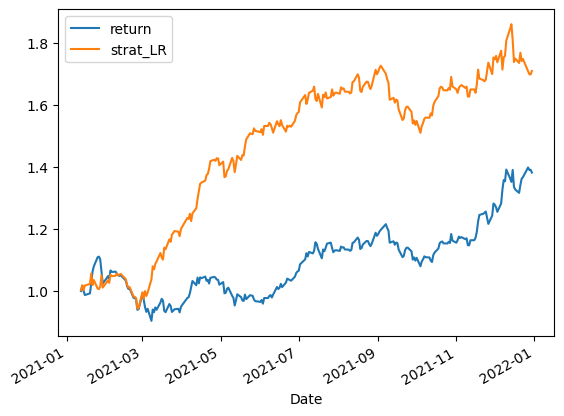

In [11]:
np.exp(df[['return','strat_LR']].cumsum()).plot()

In [12]:
train,test = train_test_split(df,shuffle=False,test_size=0.1 , random_state=0)

In [13]:
train = train.copy()
test = test.copy()
model = LinearRegression()
model.fit(train[lagnames],train['return'])

LinearRegression()

In [14]:
test['prediction_LR'] = model.predict(test[lagnames])
test['direction_LR'] = [1 if i > 0 else -1 for i in test.prediction_LR ]
test['strat_LR'] = test['direction_LR'] * test['return']

In [15]:
np.exp(test[['return' , 'strat_LR']].sum())

return      1.104021
strat_LR    0.978186
dtype: float64

In [16]:
(test['direction_LR'].diff() != 0).value_counts()

True     18
False     7
Name: direction_LR, dtype: int64

<Axes: xlabel='Date'>

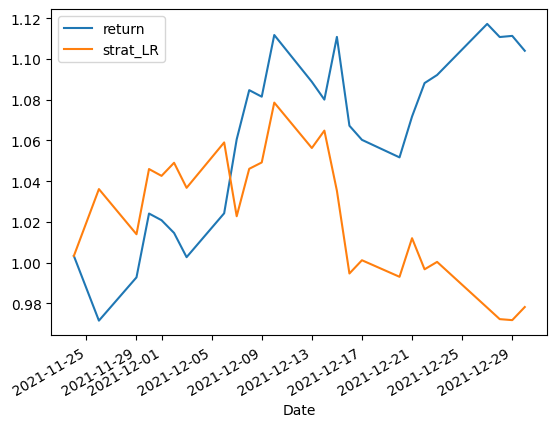

In [17]:
np.exp(test[['return','strat_LR']].cumsum()).plot()

In [18]:
test

,Open,High,Low,Close,Adj Close,Volume,return,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,prediction_LR,direction_LR,strat_LR
Date,,,,,,,,,,,,,,,
2021-11-24,160.750000,162.139999,159.639999,161.940002,160.760117,69463600,0.003278,0.002419,0.002923,0.016834,0.028136,0.016356,0.000375,1,0.003278
2021-11-26,159.570007,160.449997,156.360001,156.809998,155.667496,76959800,-0.032191,0.003278,0.002419,0.002923,0.016834,0.028136,-0.001054,-1,0.032191
2021-11-29,159.369995,161.190002,158.789993,160.240005,159.072479,88748200,0.021638,-0.032191,0.003278,0.002419,0.002923,0.016834,-0.001627,-1,-0.021638
2021-11-30,159.990005,165.520004,159.919998,165.300003,164.095627,174048100,0.031089,0.021638,-0.032191,0.003278,0.002419,0.002923,0.001464,1,0.031089
2021-12-01,167.479996,170.300003,164.529999,164.770004,163.569504,152052500,-0.003211,0.031089,0.021638,-0.032191,0.003278,0.002419,0.004465,1,-0.003211
2021-12-02,158.740005,164.199997,157.800003,163.759995,162.566864,136739200,-0.006149,-0.003211,0.031089,0.021638,-0.032191,0.003278,-0.005194,-1,0.006149
2021-12-03,164.020004,164.960007,159.720001,161.839996,160.660843,118023100,-0.011794,-0.006149,-0.003211,0.031089,0.021638,-0.032191,0.004687,1,-0.011794
2021-12-06,164.289993,167.880005,164.279999,165.320007,164.115479,107497000,0.021275,-0.011794,-0.006149,-0.003211,0.031089,0.021638,0.001733,1,0.021275
2021-12-07,169.080002,171.580002,168.339996,171.179993,169.932770,120405400,0.034833,0.021275,-0.011794,-0.006149,-0.003211,0.031089,-0.002227,-1,-0.034833
